In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/ai.csv')
df

,Unnamed: 0,제목,저자,출판사,출판일
0,0,Future Trends of AI-based Smart Systems and Se...,이대원,한국정보처리학회,2019
1,1,Future Trends of AI-Based Smart Systems and Se...,"Lee, Daewon",Korea Information Processing Society,2019
2,2,Consciousness and Intentionality in AI and the...,Michael Jin Choi(최진),한국신학정보연구원,2016
3,3,A Study on the Use of AI-based Learning Progra...,김혜숙,한국영어학회,2022
4,4,Influence of hCG Administration after AI on Co...,Hyun-Joo Lim,한국동물생명공학회(구 한국동물번식학회),2018
...,...,...,...,...,...
295,295,Application of AI-based Customer Segmentation ...,염경민,한국경영정보학회,2022
296,296,A Proposed AI-based Library Usage Management i...,Anh-Thuan Tran,한국경영정보학회,2021
297,297,Comparison of AI-algorithm Performance for Pre...,"Mollaeiubli, Takhmasib(타크마십)",대한건축학회,2022
298,298,Understanding Passengers’ Perceived Safety and...,Siew Fan Wong,한국경영정보학회,2021


In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pylab as plt
from wordcloud import STOPWORDS, WordCloud
import re

In [4]:
all_title = df['제목']
stopWord = set(stopwords.words("english"))
lemma = WordNetLemmatizer()

In [5]:
words = []
re.sub(r"[^a-zA-Z]+", " ", all_title[0])
all_title[0]

'Future Trends of AI-based Smart Systems and Services: Challenges, Opportunities, and Solutions'

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
for title in all_title:
    word = re.sub(r"[^a-zA-Z]+", " ", title)
    wordToken = word_tokenize(word.lower())
    wordTokenStopWord = [i for i in wordToken if i not in stopWord]
    wordTokenStopWordLemma = [lemma.lemmatize(w) for w in wordTokenStopWord]
    words.append(wordTokenStopWordLemma)

In [9]:
words

[['future',
  'trend',
  'ai',
  'based',
  'smart',
  'system',
  'service',
  'challenge',
  'opportunity',
  'solution'],
 ['future',
  'trend',
  'ai',
  'based',
  'smart',
  'system',
  'service',
  'challenge',
  'opportunity',
  'solution'],
 ['consciousness', 'intentionality', 'ai', 'imago', 'dei'],
 ['study',
  'use',
  'ai',
  'based',
  'learning',
  'program',
  'efl',
  'student',
  'different',
  'type',
  'teacher',
  'support'],
 ['influence',
  'hcg',
  'administration',
  'ai',
  'conception',
  'rate',
  'serum',
  'progesterone',
  'concentration',
  'dairy',
  'cattle'],
 ['vessel',
  'traffic',
  'geometric',
  'probability',
  'approach',
  'ai',
  'data',
  'active',
  'shipping',
  'lane',
  'subsea',
  'pipeline',
  'quantitative',
  'risk',
  'assessment',
  'third',
  'party',
  'impact'],
 ['survey',
  'microservices',
  'use',
  'case',
  'ai',
  'based',
  'application',
  'hybrid',
  'cloud'],
 ['future',
  'trend',
  'iot',
  'g',
  'mobile',
  'networ

In [10]:
from functools import reduce

In [11]:
word2 = reduce(lambda x, y : x+y, words)

# 리스트의 빈도수를 확인

In [12]:
count = Counter(word2)

In [13]:
pd.DataFrame(word2).value_counts()

ai               330
based            102
study             45
using             40
system            31
                ... 
inspection         1
institute          1
instruction        1
instructional      1
zymomonas          1
Length: 1081, dtype: int64

In [14]:
# 단어의 빈도수가 1보다 큰 단어만 취급
count.most_common(50)

[('ai', 330),
 ('based', 102),
 ('study', 45),
 ('using', 40),
 ('system', 31),
 ('design', 24),
 ('education', 21),
 ('data', 20),
 ('service', 19),
 ('analysis', 19),
 ('development', 19),
 ('learning', 18),
 ('artificial', 18),
 ('application', 17),
 ('research', 14),
 ('intelligence', 14),
 ('english', 13),
 ('algorithm', 12),
 ('student', 11),
 ('evaluation', 11),
 ('model', 11),
 ('effect', 11),
 ('technology', 11),
 ('network', 10),
 ('method', 10),
 ('prediction', 10),
 ('human', 10),
 ('chatbot', 10),
 ('technique', 10),
 ('solution', 9),
 ('school', 9),
 ('performance', 9),
 ('management', 9),
 ('value', 9),
 ('korea', 9),
 ('ethic', 9),
 ('edge', 9),
 ('ship', 9),
 ('big', 9),
 ('future', 8),
 ('challenge', 8),
 ('program', 8),
 ('efl', 8),
 ('assessment', 8),
 ('impact', 8),
 ('mobile', 8),
 ('korean', 8),
 ('robot', 8),
 ('monitoring', 8),
 ('platform', 8)]

In [15]:
df = pd.DataFrame(count.most_common(50), columns=['word', 'count'])
df.head()

,word,count
0,ai,330
1,based,102
2,study,45
3,using,40
4,system,31


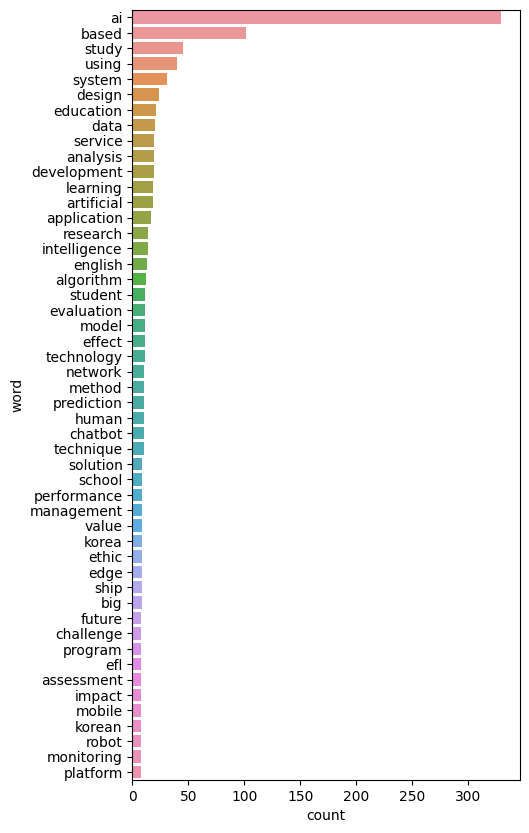

In [16]:
# plt.bar(df['word'], df['count'])
plt.figure(figsize=(5, 10))
sns.barplot(data=df, x='count', y='word')
plt.show()

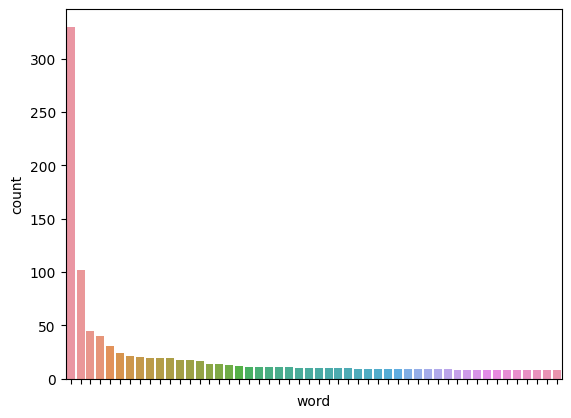

In [17]:
sns.barplot(data=df, x='word', y='count').set_xticklabels('', rotation=85)
plt.show()

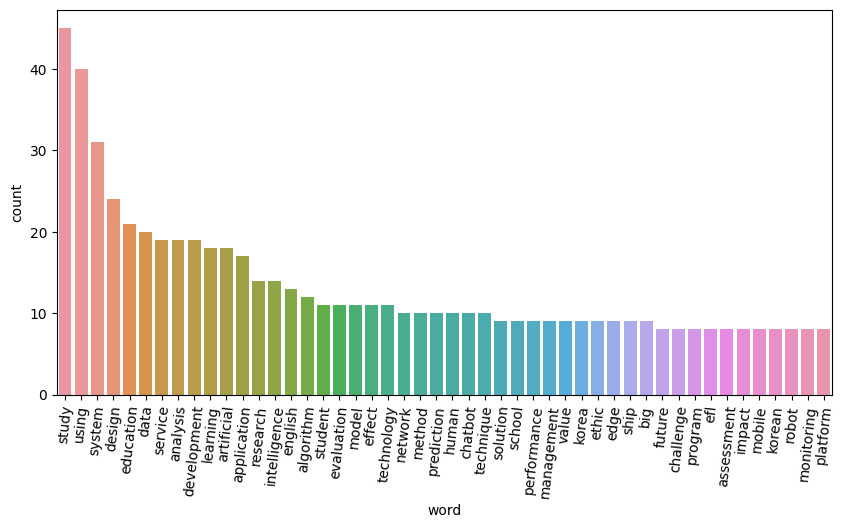

In [18]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df.loc[2:], x='word', y='count')
plt.xticks(rotation=84)
plt.show()

In [19]:
original = pd.read_csv('https://raw.githubusercontent.com/leekyuyoung20221226/python/main/data/ai.csv')
original['출판일']

0      2019
1      2019
2      2016
3      2022
4      2018
       ... 
295    2022
296    2021
297    2022
298    2021
299    2022
Name: 출판일, Length: 300, dtype: int64

In [20]:
# 출판일 별로 논문 발표 횟수
original['doc_count'] = 0
grouped = original.groupby(['출판일'], as_index=False)

In [21]:
yeargp = grouped['doc_count'].count()

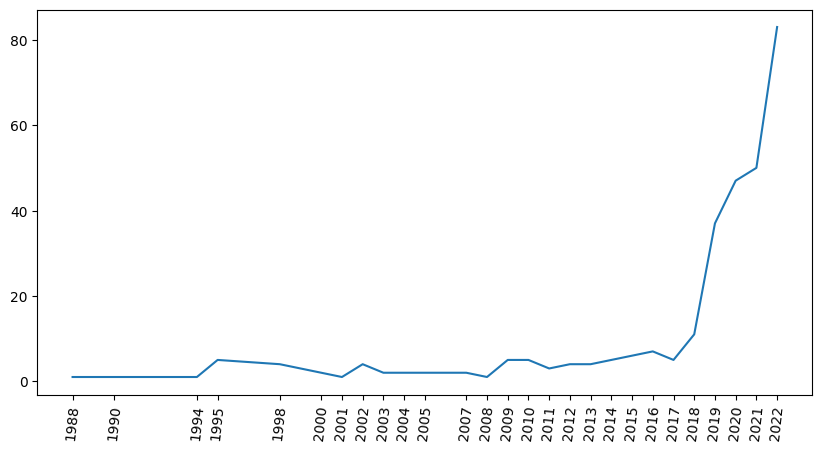

In [22]:
plt.figure(figsize=(10, 5))
# sns.barplot(data=yeargp.loc[2:], x='출판일', y='doc_count')
plt.plot(yeargp['출판일'], yeargp['doc_count'])
plt.xticks(yeargp['출판일'], rotation=84)
plt.show()

# 한글폰트

In [23]:
from matplotlib import font_manager, rc

In [24]:
font_path = 'C:/Windows/Fonts/HMKMMAG.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 워드클라우드 그리기

In [25]:
stopWord = dict(count.most_common(50))
wc = WordCloud(background_color='ivory', stopwords=stopWord, width=800, height=600)

In [26]:
dict(count.most_common(50))

{'ai': 330,
 'based': 102,
 'study': 45,
 'using': 40,
 'system': 31,
 'design': 24,
 'education': 21,
 'data': 20,
 'service': 19,
 'analysis': 19,
 'development': 19,
 'learning': 18,
 'artificial': 18,
 'application': 17,
 'research': 14,
 'intelligence': 14,
 'english': 13,
 'algorithm': 12,
 'student': 11,
 'evaluation': 11,
 'model': 11,
 'effect': 11,
 'technology': 11,
 'network': 10,
 'method': 10,
 'prediction': 10,
 'human': 10,
 'chatbot': 10,
 'technique': 10,
 'solution': 9,
 'school': 9,
 'performance': 9,
 'management': 9,
 'value': 9,
 'korea': 9,
 'ethic': 9,
 'edge': 9,
 'ship': 9,
 'big': 9,
 'future': 8,
 'challenge': 8,
 'program': 8,
 'efl': 8,
 'assessment': 8,
 'impact': 8,
 'mobile': 8,
 'korean': 8,
 'robot': 8,
 'monitoring': 8,
 'platform': 8}

In [27]:
cloud = wc.generate_from_frequencies(stopWord)

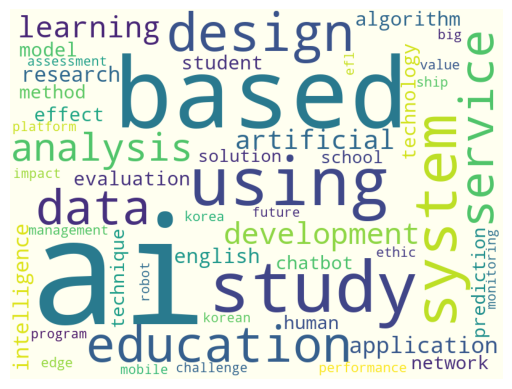

In [28]:
plt.imshow(cloud)
plt.axis('off')
plt.show()

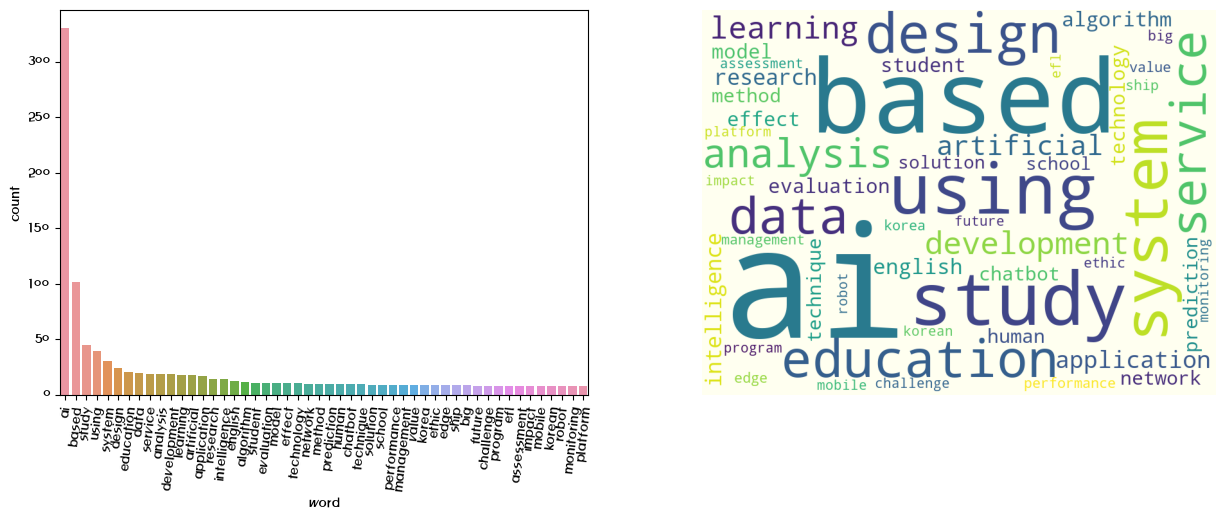

In [29]:
plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
sns.barplot(data=df, x='word', y='count')
plt.xticks(rotation=84)

plt.subplot(1,2,2)
plt.imshow(cloud)
plt.axis('off')
plt.show()

# 뉴스기사를 검색해서 클라우드 형태로 시각화 - 텍스트 분석

naver api

In [30]:
import os
import sys
import urllib.request
import json
client_id = "16Q9VECLiTyUuiSRoJDr"
client_secret = "p1wsZa60YG"

# 함수 설계
def getRequestURL(url):
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    try:
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            return response_body.decode('utf-8')
        else:
            print("Error Code:" + rescode)
            return None
    except Exception as e:
        print(e)
        return None

def getNaverSearch(srcText, searchType='news', display=10, start=1):
    encText = urllib.parse.quote(srcText)
    url = f"https://openapi.naver.com/v1/search/{searchType}.json?query={encText}&display={display}&start={start}&sort=sim"
    jsonData = getRequestURL(url)
    if jsonData == None:
        return None
    else:
        return json.loads(jsonData)

In [31]:
getNaverSearch('난방비')

{'lastBuildDate': 'Thu, 02 Feb 2023 21:24:22 +0900',
 'total': 119994,
 'start': 1,
 'display': 10,
 'items': [{'title': '모든 기초수급자·차상위계층에 <b>난방비</b> 59만2천원 지원한다',
   'originallink': 'https://www.yna.co.kr/view/AKR20230201012900003?input=1195m',
   'link': 'https://n.news.naver.com/mnews/article/001/0013729882?sid=100',
   'description': '최대 168만가구에 <b>난방비</b> 할인혜택 잠재적 빈곤층인 차상위계층에도 요금할인 등 적용 몰라서 못받는 가구 최소화…중산층 지원도 검토 중 (서울=연합뉴스) 홍국기 기자 = 정부가 &apos;<b>난방비</b> 폭탄&apos;으로 어려움을 겪는... ',
   'pubDate': 'Wed, 01 Feb 2023 08:00:00 +0900'},
  {'title': '“매출 줄었는데 <b>난방비</b>만 올랐다”… 소상공인 99% <b>난방비</b> 부담',
   'originallink': 'https://biz.chosun.com/distribution/channel/2023/02/02/XOIEHKELEVDYTCPEOWCBANEBE4/?utm_source=naver&utm_medium=original&utm_campaign=biz',
   'link': 'https://n.news.naver.com/mnews/article/366/0000874401?sid=101',
   'description': '소상공인 대부분이 급등한 <b>난방비</b>에 부담을 느끼는 것으로 조사됐다. 1월 매출은 오히려 줄었는데 비용만... 운영에서 <b>난방 비</b>용이 부담된다는 응답이 99.0%에 달했다. 매우 부담된다는 응답은 80.4%였다. 특히 숙박업과... ',


In [32]:
starts = [i for i in range(1, 1000, 100)] + [1000]
result = []
for start in starts:
    result.append(getNaverSearch('난방비', display=100, start=start)['items'])

In [33]:
result = reduce(lambda x,y : x+y, result)

In [34]:
result[0]['description']

'최대 168만가구에 <b>난방비</b> 할인혜택 잠재적 빈곤층인 차상위계층에도 요금할인 등 적용 몰라서 못받는 가구 최소화…중산층 지원도 검토 중 (서울=연합뉴스) 홍국기 기자 = 정부가 &apos;<b>난방비</b> 폭탄&apos;으로 어려움을 겪는... '

In [35]:
re.sub(r"[^ㄱ-ㅎ가-힣]+", " ", result[0]['description'])

'최대 만가구에 난방비 할인혜택 잠재적 빈곤층인 차상위계층에도 요금할인 등 적용 몰라서 못받는 가구 최소화 중산층 지원도 검토 중 서울 연합뉴스 홍국기 기자 정부가 난방비 폭탄 으로 어려움을 겪는 '

In [36]:
!pip install konlpy

In [37]:
from konlpy.tag import Okt

In [38]:
nlp = Okt()

JVMNotFoundException: No JVM shared library file (jvm.dll) found. Try setting up the JAVA_HOME environment variable properly.

In [39]:
message_n = nlp.nouns(re.sub(r"^ㄱ-ㅎ가-힣]+", " ", result[0]['description']))

NameError: name 'nlp' is not defined

In [41]:
kor_result = []
for docs in result:
    message = nlp.nouns(re.sub(r"^ㄱ-ㅎ가-힣]+", " ", docs['description']))
    message_n = nlp.nouns(message)
    kor_result.append(message_n)

NameError: name 'nlp' is not defined

In [42]:
kor_result = reduce(lambda x,y : x+y, kor_result)

TypeError: reduce() of empty iterable with no initial value

In [43]:
kor_result = [w for w in kor_result if len(w) > 1]

In [44]:
count = Counter(kor_result)

In [45]:
word_count = count.most_common(50)

In [46]:
df = pd.DataFrame(word_count, columns=['단어', '단어수'])
df.head()

,단어,단어수


In [47]:
sns.barplot(data=df, x='단어', y='단어수')
plt.show()

ValueError: min() arg is an empty sequence